In [175]:
import pandas as pd
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt

Name                         Parent
0                        English                            NaN
1  Literary and Cultural Studies                        English
2                       Rhetoric                        English
3               Creative Writing                        English
4    Critical University Studies  Literary and Cultural Studies

In [2]:
df= pd.read_csv('tree_data.csv')
df = df.sort_values(by='Name')
fig = px.treemap(
    names = df['Name'],
    parents = df['Parent']
)
fig.update_traces(root_color="darkgray")
fig.update_layout(margin = dict(t=100, l=50, r=50, b=50))
fig.show()

In [26]:
import chart_studio
import chart_studio.plotly as py
username = 'cwarren'
api_key = 'wKfT6rEG7N5gNaOeWPiP'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [33]:
py.plot(fig, filename = 'english tree demo', auto_open=False)

'https://plotly.com/~cwarren/158/'

In [218]:
from bokeh.io import output_notebook, show, save
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8, Accent

In [17]:
output_notebook()

Loading BokehJS ...

In [47]:
for k in data:
    print(data[k])

Marian Aguiar
Kathleen Newman
Richard Purcell
Christopher Warren
Mariam Wassif
David Shumway
Jeffrey Williams
Sede Makonnen
Stephen Wittek
John Oddo
James Wynn
David Brown
Necia Werner
Linda Flower
Suguru Ishizaki
Andreea Deciu Ritivoi
Danielle Wetzel
Joanna Wolfe
Stephanie Larsen
Doug Coulson
Sharon Dilworth
Jane Bernstein
Gerald Costanzo
Jane McCafferty
Jason England
Kevin Gonzalez
Lauren Shapiro
Camille Rankine


In [167]:

communities = nx.community.greedy_modularity_communities(B, n_communities=3)
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        print(community_number)
        modularity_color[name] = Spectral8[community_number]
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
networkx.set_node_attributes(G, modularity_color, 'modularity_color')

TypeError: greedy_modularity_communities() got an unexpected keyword argument 'n_communities'

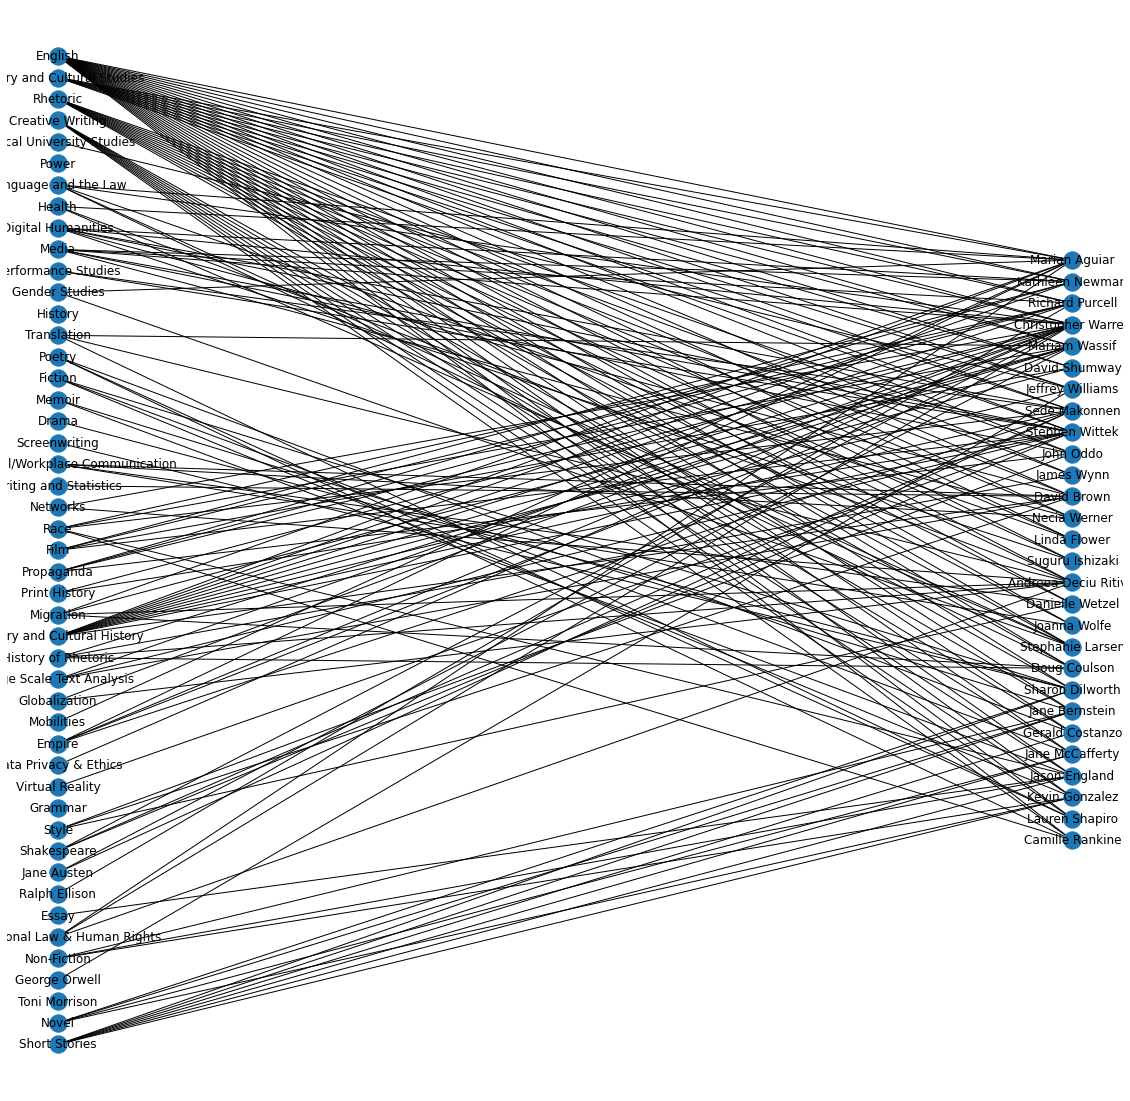

In [120]:
fig, ax = plt.subplots(figsize=(20,20))
#nx.draw_networkx_labels(B, pos=nx.spring_layout(B), ax=ax)
nx.draw(B, pos=nx.multipartite_layout(B, subset_key='bipartite'), with_labels=True,ax=ax)

In [249]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Scatter, Range1d, Circle, ColumnDataSource, MultiLine, LabelSet, EdgesAndLinkedNodes, NodesAndLinkedEdges
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import pygraphviz

ModuleNotFoundError: No module named 'pygraphviz'

In [242]:
palette = plt.cm.get_cmap('Paired').colors
groups = pd.read_csv('groups2.csv')
B = nx.Graph()
faculty = {k: {'label':k, 'bipartite':1, 'color': Accent[3][0]} for k in groups['English']}
faculty = [(k, faculty[k]) for k in faculty]
group_nodes = [(group, {'label':group, 'bipartite':0, 'color': Accent[3][1]}) for group in groups.columns]
#B.add_nodes_from(groups['English'], labels={k:k for k in groups['English']}, bipartite=0)
B.add_nodes_from(faculty)
B.add_nodes_from(group_nodes)
for column in groups.columns:
    for value in groups[column].dropna():
        B.add_edge(column, value)
degrees = dict(nx.degree(B))
for key in degrees:    
    degrees[key] *=  2
nx.set_node_attributes(B, name='degree', values=degrees)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(B)])
nx.set_node_attributes(B, name='adjusted_node_size', values=adjusted_node_size)

In [250]:
#Choose a title!
title = 'English Department Research Foci'

#pos = nx.nx_agraph.graphviz_layout(B, prog="twopi", root=0)
pos= nx.spring_layout(B)
#pos= nx.circular_layout(B)

node_highlight_color = Accent[7][5]
edge_highlight_color = Accent[7][5]

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Label", "@index"),  ]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-.3, .3), y_range=Range1d(-.3,.3), title=title, plot_width=1000)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
#network_graph = from_networkx(B, nx.multipartite_layout(B, subset_key='bipartite'), scale=10, center=(0, 0))
network_graph = from_networkx(B, pos, scale=10, center=(0, 0))


#Set node size and color
network_graph.node_renderer.glyph = Circle(size='adjusted_node_size', fill_color='color')

#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(fill_color=node_highlight_color, line_width=2)


#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_color='white', line_alpha=0.5, line_width=1)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=4)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=4)


#Add network graph to the plot
plot.renderers.append(network_graph)

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
#network_graph.selection_policy = EdgesAndLinkedNodes()
network_graph.inspection_policy = NodesAndLinkedEdges()

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(B.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
save(plot, filename=f"{title}.html")

'/Users/user/Library/CloudStorage/Box-Box/Teaching (CMU)/Admin/English Research Tree/English Department Research Foci.html'

In [47]:
df[['Name', 'Parent']].to_markdown('out.md')

In [45]:
df.columns

Index(['Name', 'Parent', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [13]:
import plotly.figure_factory as ff


Error importing optional module geopandas
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/_plotly_utils/optional_imports.py", line 30, in get_module
    return import_module(name)
  File "/Users/user/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas.geoseries import GeoSeries  # noqa
  File "/Users/u

In [21]:


fig2 = px.sunburst(df, path=['Name', 'Parent'], color='Parent')
fig2.update_layout(title_text="Two-level Sunburst Diagram", font_size=10)
fig2.show()


In [15]:
df

Name                         Parent
0                                English                            NaN
1          Literary and Cultural Studies                        English
2                               Rhetoric                        English
3                       Creative Writing                        English
4            Critical University Studies  Literary and Cultural Studies
5                                  Power                        English
6                   Language and the Law                          Power
7                                 Health                       Rhetoric
8                     Digital Humanities                        English
9                                  Media                        English
10                   Performance Studies  Literary and Cultural Studies
11                        Gender Studies                          Power
12                               History                        English
13                           Translation                      Migration
14                                Poetry               Creative Writing
15                               Fiction               Creative Writing
16                                Memoir                    Non-Fiction
17                                 Drama               Creative Writing
18                         Screenwriting               Creative Writing
19  Professional/Workplace Communication                       Rhetoric
20                Writing and Statistics                       Rhetoric
21                              Networks             Digital Humanities
22                                  Race                          Power
23                                  Film                          Media
24                            Propaganda                          Media
25                         Print History                          Media
26                             Migration                        English
27         Literary and Cultural History                        History
28                   History of Rhetoric                        History
29             Large Scale Text Analysis             Digital Humanities
30                         Globalization                      Migration
31                            Mobilities                      Migration
32                                Empire                      Migration
33                 Data Privacy & Ethics             Digital Humanities
34                                    VR             Digital Humanities
35                               Grammar                       Rhetoric
36                                 Style                       Rhetoric
37                           Shakespeare  Literary and Cultural History
38                           Jane Austen  Literary and Cultural History
39                         Ralph Ellison  Literary and Cultural History
40                                 Essay                    Non-Fiction
41                          Human Rights                      Migration
42                           Non-Fiction               Creative Writing
43                         George Orwell  Literary and Cultural History
44                         Toni Morrison  Literary and Cultural History

In [29]:
df

Name                         Parent
18                         Screenwriting               Creative Writing
15                               Fiction               Creative Writing
42                           Non-Fiction               Creative Writing
14                                Poetry               Creative Writing
17                                 Drama               Creative Writing
21                              Networks             Digital Humanities
34                       Virtual Reality             Digital Humanities
33                 Data Privacy & Ethics             Digital Humanities
29             Large Scale Text Analysis             Digital Humanities
12                               History                        English
1          Literary and Cultural Studies                        English
8                     Digital Humanities                        English
5                                  Power                        English
3                       Creative Writing                        English
2                               Rhetoric                        English
26                             Migration                        English
9                                  Media                        English
45                                 Novel                        Fiction
46                         Short Stories                        Fiction
27         Literary and Cultural History                        History
28                   History of Rhetoric                        History
39                         Ralph Ellison  Literary and Cultural History
38                           Jane Austen  Literary and Cultural History
37                           Shakespeare  Literary and Cultural History
43                         George Orwell  Literary and Cultural History
44                         Toni Morrison  Literary and Cultural History
4            Critical University Studies  Literary and Cultural Studies
10                   Performance Studies  Literary and Cultural Studies
23                                  Film                          Media
24                            Propaganda                          Media
25                         Print History                          Media
30                         Globalization                      Migration
31                            Mobilities                      Migration
13                           Translation                      Migration
32                                Empire                      Migration
41      International Law & Human Rights                      Migration
40                                 Essay                    Non-Fiction
16                                Memoir                    Non-Fiction
6                   Language and the Law                          Power
11                        Gender Studies                          Power
22                                  Race                          Power
20                Writing and Statistics                       Rhetoric
35                               Grammar                       Rhetoric
19  Professional/Workplace Communication                       Rhetoric
36                                 Style                       Rhetoric
7                                 Health                       Rhetoric
0                                English                            NaN